### Martin O'Connell
### ISYE 6644
### Summer 2022
### Blackjack Simulation Project

In [27]:
import random
from statistics import mean
from statistics import median 
from statistics import stdev

# Initialize deck
def new_deck(num_decks=4):
    deck = [# 2, 3, 4, 5, 6, 7, 8, 9, 10,  J, Q,  K,  A
              2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11,
              2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11,
              2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11,
              2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11,
            ]
    # Add decks
    deck = deck * num_decks
    # Shuffle deck
    random.shuffle(deck)
    return list(deck)

# Deal Cards
def deal_cards(deck):
    dealer_cards = []
    player_cards = []
     
    # Deal cards
    player_cards.append(deck.pop(0))
    dealer_cards.append(deck.pop(0))
    player_cards.append(deck.pop(0))
    dealer_cards.append(deck.pop(0))
     
    return player_cards, dealer_cards 

# Decide if player splits cards
def split_cards(player_cards, dealer_card, deck):
    # Initializing double decks
    player_deck_1 = []
    player_deck_2 = []
    # If the cards are not the same or equal to 4, 5, or 10 they will not be split
    if player_cards[0] != player_cards[1] or player_cards[0] in [4, 5, 10]:
        return [player_cards]
    elif player_cards[0] in [8,11] or dealer_card < 7:
        player_deck_1.append(player_cards[0])
        player_deck_2.append(player_cards[1])
        player_deck_1.append(deck.pop(0))
        player_deck_2.append(deck.pop(0))
        return [player_deck_1, player_deck_2]
    else:
        return [player_cards]
        
# Used if player hand contains Ace
def soft_totals(player_cards, dealer_card, deck):
    if sum(player_cards) >= 19: # Stay if total is greater than or equal to 19
        return player_cards
    elif sum(player_cards) == 18 and dealer_card <= 8: # Stay if total is 18 and dealer card is less than or equal to 8
        return player_cards
    else: # Keep hitting until previous 2 conditions are met
        for i, card in enumerate(player_cards):
            if card == 11:
                player_cards[i] = 1
        player_cards.append(deck.pop(0))
        return soft_totals(player_cards, dealer_card, deck)


# Decide if dealer plays
def dealer_play(dealer_cards, deck):
    # Dealer will hit until atleast 17 (Casino Rule) 
    while sum(dealer_cards) < 18:
        exit = False
        # Check for soft 17 (Ace can be 11 or 1)
        if sum(dealer_cards) == 17: 
            for i, card in enumerate(dealer_cards):
                if card == 11:
                    exit = False
                    dealer_cards[i] = 1
                else:
                    exit = True
        if exit:
            break
        # Deal another card to dealer
        dealer_cards.append(deck.pop(0))
        
    return dealer_cards
 
# Decide if player plays hand based off a typical blackjack strategy
def typ_player_play(player_cards, dealer_card, deck):
    # Looping through player hands, could be multiple if cards were split
    if sum(player_cards) >= 21:
        return player_cards
    # code for checking for soft totals (look at method) 
    elif 11 in player_cards:
        return soft_totals(player_cards, dealer_card, deck)
    # hard total strategy implemented    
    elif sum(player_cards) >= 17:
        return player_cards
    elif sum(player_cards) >= 13 and dealer_card <= 6:
        return player_cards
    elif sum(player_cards) == 12 and dealer_card in [4,5,6]:
        return player_cards
    else:
        player_cards.append(deck.pop(0))
        return typ_player_play(player_cards, dealer_card, deck)

# Using a no bust strategy where the player always hits with a total 11 or less and never when above 12
def no_bust(player_cards, dealer_card, deck):
# Looping through player hands, could be multiple if cards were split
    if sum(player_cards) >= 12:
        return player_cards
    else:
        player_cards.append(deck.pop(0))
        return no_bust(player_cards, dealer_card, deck)
    

In [30]:
# Number of days implementing strategy 
simulations = 5000
#Initialize daily win amount list for bet types
d_sim_wins = []
m_sim_wins = []
p_sim_wins = []
o_sim_wins = []
# Number of games played in 3 hours
games = 150
# Number of card decks used
num_decks = 4
# Percentage of cards left in the deck before reshuffling
shuffle_perc = 50
# Calc total number of cards in combined deck
deck_total = num_decks * 52

# Testing the most common beginners blackjack strategy with a combo of bankroll
for i in range(simulations):

    # Initialize first deck
    deck = new_deck(num_decks)
    # default bet amount
    default_bet = 20
    # martingale Bet Amount
    m_bet_amount = default_bet
    # Paroli bet amount 
    p_bet_amount = default_bet
    # Oscar bet amount
    o_bet_amount = default_bet
    # Initialize bet tracking lists
    default_win = []
    martingale_win = []
    paroli_win = []
    oscar_win = []
    # default bankroll
    d_bankroll = 0
    # martingale bankroll
    m_bankroll = 0
    # paroli bankroll 
    p_bankroll = 0
    # wins for tracking paroli
    p_wins = 0
    # oscar bankroll 
    o_bankroll = 0
    # wins for tracking oscar
    o_wins = 0
    # tracking oscar profit
    profit = 0
    # total dealer hands for troubleshooting
    d_total_hands = []
    # total player hands for troubleshooting
    p_total_hands = []
    
    for i in range(games):
        # Check if remaining deck is greater than reshuffle threshold
        if len(deck) / deck_total <= shuffle_perc:
            deck = new_deck(num_decks)
        # Dealing cards
        player_cards, dealer_cards = deal_cards(deck)
        # Storing visible dealer card 
        dealer_card = dealer_cards[0]
        # Split cards if deemed possible / advantageous
        player_cards = split_cards(player_cards, dealer_card, deck)
        # loop through player hands
        player_hands = []
        for player_hand in player_cards:
            if 11 in player_hand:
                player_hands.append(soft_totals(player_hand, dealer_card, deck))
                p_total_hands.append(soft_totals(player_hand, dealer_card, deck))
            else:
                player_hands.append(typ_player_play(player_hand, dealer_card, deck))
                p_total_hands.append(typ_player_play(player_hand, dealer_card, deck))
        # dealer play
        dealer_hand = dealer_play(dealer_cards, deck)
        d_total_hands.append(dealer_play(dealer_cards, deck))
        
        # tracking each player hand 
        for hand in player_hands:
            if sum(hand) > 21:
                # default tracking
                default_win.append(-default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(-m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = m_bet_amount * 2
                # paroli tracking
                paroli_win.append(-p_bet_amount)
                p_bankroll += p_bet_amount
                # oscar tracking
                oscar_win.append(-o_bet_amount)
                o_bankroll += o_bet_amount
                if o_wins >= 1 and profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += -o_bet_amount 
                if o_wins == 0:
                    o_bet_amount = default_bet
                    profit += -o_bet_amount
            elif sum(hand) == sum(dealer_hand):
                # default tracking 
                default_win.append(0)
                # martingale tracking
                martingale_win.append(0)
                # paroli tracking
                paroli_win.append(0)
                # oscar tracking
                oscar_win.append(0)
            elif sum(hand) == 21 and len(hand) == 2:
                # default tracking
                default_win.append(default_bet * .5)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount * .5)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet 
                # paroli tracking
                paroli_win.append(p_bet_amount * .5)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(o_bet_amount * .5)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount / 2
                else:
                    oscar_bet = default_bet
                    o_wins = 0
                    profit = 0
            elif sum(dealer_hand) > 21:
                # default tracking
                default_win.append(default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet
                # paroli tracking
                paroli_win.append(p_bet_amount)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0 
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(o_bet_amount)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount
                else:
                    o_bet_amount = default_bet
                    o_wins = 0
                    profit = 0
            elif sum(hand) < sum(dealer_hand):
                # default tracking 
                default_win.append(-default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(-m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = m_bet_amount * 2
                # paroli tracking
                paroli_win.append(-p_bet_amount)
                p_bankroll += p_bet_amount
                p_bet_amount = default_bet
                # oscar tracking
                oscar_win.append(-o_bet_amount)
                o_bankroll += o_bet_amount
                if o_wins >= 1 and profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += -o_bet_amount
                if o_wins == 0:
                    o_bet_amount = default_bet
                    profit += -o_bet_amount
            elif sum(hand) > sum(dealer_hand):
                # default tracking
                default_win.append(default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount * 2)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet
                # paroli tracking
                paroli_win.append(p_bet_amount)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0 
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(o_bet_amount)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount
                else:
                    o_bet_amount = default_bet
                    o_wins = 0
                    profit = 0

    # Calculating percent loss/gain for each bet method
    default_total = sum(default_win)
    martingale_total = sum(martingale_win)
    paroli_total = sum(paroli_win)
    oscar_total = sum(oscar_win)

    d_percent_return = (default_total / d_bankroll) * 100
    m_percent_return = (martingale_total / m_bankroll) * 100
    p_percent_return = (paroli_total / p_bankroll) * 100
    o_percent_return = (oscar_total / o_bankroll) * 100

    d_sim_wins.append(d_percent_return)
    m_sim_wins.append(m_percent_return)
    p_sim_wins.append(p_percent_return)
    o_sim_wins.append(o_percent_return)
print("Median gain/loss percentage using same bet: " + str(median(d_sim_wins)))
print("Median gain/loss percentage using martingale system: " + str(median(m_sim_wins)))
print("Median gain/loss percentage using paroli system: " + str(median(p_sim_wins)))
print("Median gain/loss percentage using oscar system: " + str(median(o_sim_wins)))

Median gain/loss percentage using same bet: -6.785714285714286
Median gain/loss percentage using martingale system: 25.69461867541574
Median gain/loss percentage using paroli system: -7.011388566266615
Median gain/loss percentage using oscar system: -6.4321074964639315


In [31]:
print("Gain/loss percentage standard deviation using same bet: " + str(stdev(d_sim_wins)))
print("Gain/loss percentage standard deviation using martingale system: " + str(stdev(m_sim_wins)))
print("Gain/loss percentage standard deviation using paroli system: " + str(stdev(p_sim_wins)))
print("Gain/loss percentage standard deviation using oscar system: " + str(stdev(o_sim_wins)))

Gain/loss percentage standard deviation using same bet: 8.473850887264186
Gain/loss percentage standard deviation using martingale system: 14.815724180529244
Gain/loss percentage standard deviation using paroli system: 12.613432870010774
Gain/loss percentage standard deviation using oscar system: 9.915070541074385


Text(0.5, 0, 'Data')

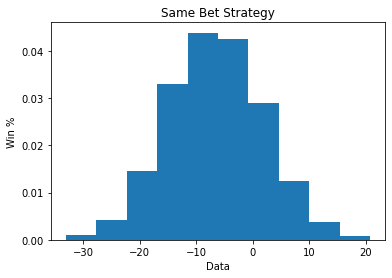

In [17]:
# Plotting default distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plotting same bet strategy distribution for typical strategy
plt.hist(d_sim_wins, density=True, bins=10) 
plt.title('Same Bet Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

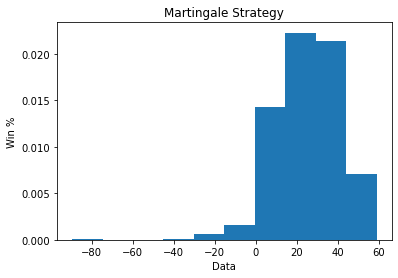

In [18]:
# Plotting martingale strategy distribution for typical strategy
plt.hist(m_sim_wins, density=True, bins=10) 
plt.title('Martingale Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

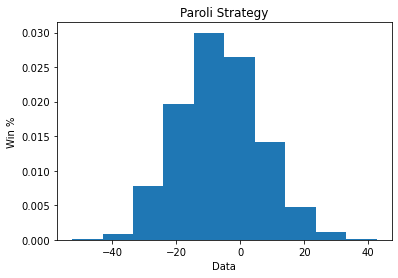

In [19]:
# Plotting paroli strategy distribution for typical strategy
plt.hist(p_sim_wins, density=True, bins=10) 
plt.title('Paroli Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

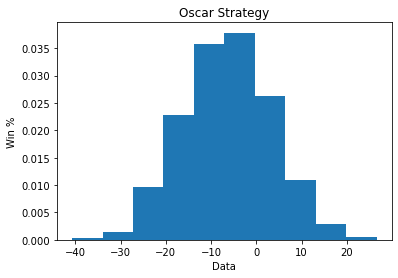

In [20]:
# Plotting oscar strategy for never bust strategy
plt.hist(o_sim_wins, density=True, bins=10) 
plt.title('Oscar Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

In [21]:
# Number of days implementing strategy 
simulations = 5000
#Initialize daily win amount list for bet types
d_sim_wins = []
m_sim_wins = []
p_sim_wins = []
o_sim_wins = []
# Number of games played in 3 hours
games = 150
# Number of card decks used
num_decks = 4
# Percentage of cards left in the deck before reshuffling
shuffle_perc = 50
# Calc total number of cards in combined deck
deck_total = num_decks * 52

# Testing the no bust strategy with a combo of bankroll strategies
for i in range(simulations):

    # Initialize first deck
    deck = new_deck(num_decks)
    # default bet amount
    default_bet = 20
    # martingale Bet Amount
    m_bet_amount = 20
    # Paroli bet amount 
    p_bet_amount = 20
    # Oscar bet amount
    o_bet_amount = 20
    # Initialize bet tracking lists
    default_win = []
    martingale_win = []
    paroli_win = []
    oscar_win = []
    # default bankroll
    d_bankroll = 0
    # martingale bankroll
    m_bankroll = 0
    # paroli bankroll 
    p_bankroll = 0
    # wins for tracking paroli
    p_wins = 0
    # oscar bankroll 
    o_bankroll = 0
    # wins for tracking oscar
    o_wins = 0
    # tracking oscar profit
    profit = 0
    
    for i in range(games):
        # Check if remaining deck is greater than reshuffle threshold
        if len(deck) / deck_total <= shuffle_perc:
            deck = new_deck(num_decks)
        # Dealing cards
        player_cards, dealer_cards = deal_cards(deck)
        # Storing visible dealer card 
        dealer_card = dealer_cards[0]
        # Split cards if deemed possible / advantageous
        player_cards = split_cards(player_cards, dealer_card, deck)
        # loop through player hands
        player_hands = []
        for player_hand in player_cards:
            if 11 in player_hand:
                player_hands.append(soft_totals(player_hand, dealer_card, deck))
            else:
                player_hands.append(no_bust(player_hand, dealer_card, deck))
        # dealer play
        dealer_hand = dealer_play(dealer_cards, deck)
        d_total_hands.append(dealer_play(dealer_cards, deck))
        
        # tracking each player hand 
        for hand in player_hands:
            if sum(hand) > 21:
                # default tracking
                default_win.append(-default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(-m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = m_bet_amount * 2
                # paroli tracking
                paroli_win.append(-p_bet_amount)
                p_bankroll += p_bet_amount
                # oscar tracking
                oscar_win.append(-o_bet_amount)
                o_bankroll += o_bet_amount
                if o_wins >= 1 and profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += -o_bet_amount 
                if o_wins == 0:
                    o_bet_amount = default_bet
                    profit += -o_bet_amount
            elif sum(hand) == sum(dealer_hand):
                # default tracking 
                default_win.append(0)
                # martingale tracking
                martingale_win.append(0)
                # paroli tracking
                paroli_win.append(0)
                # oscar tracking
                oscar_win.append(0)
            elif sum(hand) == 21 and len(hand) == 2:
                # default tracking
                default_win.append(default_bet * .5)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount * .5)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet 
                # paroli tracking
                paroli_win.append(p_bet_amount * .5)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(o_bet_amount * .5)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount / 2
                else:
                    oscar_bet = default_bet
                    o_wins = 0
                    profit = 0
            elif sum(dealer_hand) > 21:
                # default tracking
                default_win.append(default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet
                # paroli tracking
                paroli_win.append(p_bet_amount)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0 
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(o_bet_amount)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount
                else:
                    o_bet_amount = default_bet
                    o_wins = 0
                    profit = 0
            elif sum(hand) < sum(dealer_hand):
                # default tracking 
                default_win.append(-default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(-m_bet_amount)
                m_bankroll += m_bet_amount
                m_bet_amount = m_bet_amount * 2
                # paroli tracking
                paroli_win.append(-p_bet_amount)
                p_bankroll += p_bet_amount
                p_bet_amount = default_bet
                # oscar tracking
                oscar_win.append(-oscar_bet)
                o_bankroll += o_bet_amount
                if o_wins >= 1 and profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += -o_bet_amount
                if o_wins == 0:
                    o_bet_amount = default_bet
                    profit += -o_bet_amount
            elif sum(hand) > sum(dealer_hand):
                # default tracking
                default_win.append(default_bet)
                d_bankroll += default_bet
                # martingale tracking
                martingale_win.append(m_bet_amount * 2)
                m_bankroll += m_bet_amount
                m_bet_amount = default_bet
                # paroli tracking
                paroli_win.append(p_bet_amount)
                p_bankroll += p_bet_amount
                if p_wins > 3:
                    p_bet_amount = default_bet
                    p_wins = 0 
                else:
                    p_bet_amount = p_bet_amount * 2
                    p_wins += 1
                # oscar tracking
                oscar_win.append(oscar_bet)
                o_bankroll += o_bet_amount
                if profit < default_bet:
                    o_bet_amount = o_bet_amount * 2
                    profit += o_bet_amount
                else:
                    o_bet_amount = default_bet
                    o_wins = 0
                    profit = 0

    # Calculating percent loss/gain for each bet method
    default_total = sum(default_win)
    martingale_total = sum(martingale_win)
    paroli_total = sum(paroli_win)
    oscar_total = sum(oscar_win)

    d_percent_return = (default_total / d_bankroll) * 100
    m_percent_return = (martingale_total / m_bankroll) * 100
    p_percent_return = (paroli_total / p_bankroll) * 100
    o_percent_return = (oscar_total / o_bankroll) * 100

    d_sim_wins.append(d_percent_return)
    m_sim_wins.append(m_percent_return)
    p_sim_wins.append(p_percent_return)
    o_sim_wins.append(o_percent_return)
print("Median gain/loss percentage using same bet: " + str(median(d_sim_wins)))
print("Median gain/loss percentage using martingale system: " + str(median(m_sim_wins)))
print("Median gain/loss percentage using paroli system: " + str(median(p_sim_wins)))
print("Median gain/loss percentage using oscar system: " + str(median(o_sim_wins)))

Median gain/loss percentage using same bet: -6.474820143884892
Median gain/loss percentage using martingale system: 20.067405654690138
Median gain/loss percentage using paroli system: -7.259395294368147
Median gain/loss percentage using oscar system: 5.681818181818182


In [29]:
print("Gain/loss percentage standard deviation using same bet: " + str(stdev(d_sim_wins)))
print("Gain/loss percentage standard deviation using martingale system: " + str(stdev(m_sim_wins)))
print("Gain/loss percentage standard deviation using paroli system: " + str(stdev(p_sim_wins)))
print("Gain/loss percentage standard deviation using oscar system: " + str(stdev(o_sim_wins)))

Gain/loss percentage standard deviation using same bet: 8.145754292692772
Gain/loss percentage standard deviation using martingale system: 13.593027082781422
Gain/loss percentage standard deviation using paroli system: 11.94581295560014
Gain/loss percentage standard deviation using oscar system: 7.378341641490387


Text(0.5, 0, 'Data')

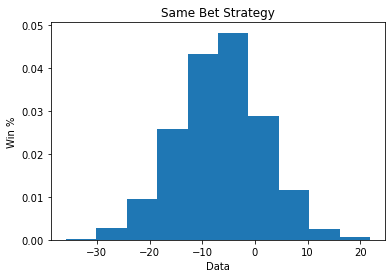

In [22]:
# Plotting same bet strategy distribution for never bust strategy
plt.hist(d_sim_wins, density=True, bins=10) 
plt.title('Same Bet Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

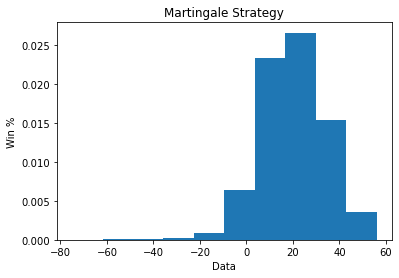

In [23]:
# Plotting martingale strategy distribution for never bust
plt.hist(m_sim_wins, density=True, bins=10) 
plt.title('Martingale Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

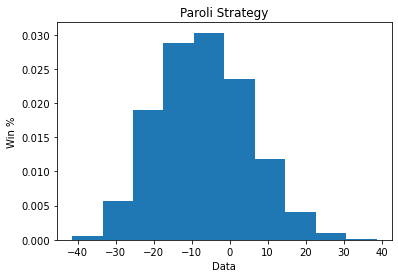

In [24]:
# Plotting paroli strategy distribution for never bust strategy
plt.hist(p_sim_wins, density=True, bins=10) 
plt.title('Paroli Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')

Text(0.5, 0, 'Data')

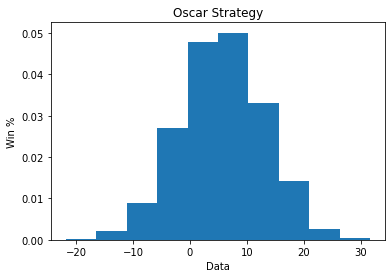

In [25]:
# Plotting oscar strategy for never bust strategy
plt.hist(o_sim_wins, density=True, bins=10) 
plt.title('Oscar Strategy')
plt.ylabel('Probability')
plt.xlabel('Win %')